## Lab 10. Face detection


### import libaries

In [1]:
import cv2
import time
import numpy as np
from IPython.display import clear_output
from matplotlib import pyplot as plt

### Download images

In [2]:
!wget https://avatars.mds.yandex.net/get-kinopoisk-post-img/1642096/6a983456f20bd5c47db18643146cd8e7/960x540 -O pulp.jpg
!wget https://vignette.wikia.nocookie.net/houseofnight/images/8/8b/Cats.jpg/revision/latest?cb=20130812053537 -O cats.jpg
!wget "https://docs.google.com/uc?export=download&id=1Ee61L451tdO68fHtWRyvgmlN9wV5Jx95" -O vid.mp4
#clear_output()
print('Download completed!')

--2021-02-22 18:14:18--  https://avatars.mds.yandex.net/get-kinopoisk-post-img/1642096/6a983456f20bd5c47db18643146cd8e7/960x540
Resolving avatars.mds.yandex.net (avatars.mds.yandex.net)... 87.250.247.183, 87.250.247.184, 87.250.247.181, ...
Connecting to avatars.mds.yandex.net (avatars.mds.yandex.net)|87.250.247.183|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 79215 (77K) [image/jpeg]
Saving to: ‘pulp.jpg’

pulp.jpg            100%[===================>]  77.36K   204KB/s    in 0.4s    

2021-02-22 18:14:20 (204 KB/s) - ‘pulp.jpg’ saved [79215/79215]

--2021-02-22 18:14:20--  https://vignette.wikia.nocookie.net/houseofnight/images/8/8b/Cats.jpg/revision/latest?cb=20130812053537
Resolving vignette.wikia.nocookie.net (vignette.wikia.nocookie.net)... 74.120.184.204, 74.120.184.194
Connecting to vignette.wikia.nocookie.net (vignette.wikia.nocookie.net)|74.120.184.204|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 283932 (277K) [image/j

### Helper functions

In [3]:
 def read_and_resize_image(filename, grayscale = False, fx= 0.5, fy=0.5):
    if grayscale:
      img_result = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    else:
      imgbgr = cv2.imread(filename, cv2.IMREAD_COLOR)
      img_result = cv2.cvtColor(imgbgr, cv2.COLOR_BGR2RGB)
    img_result = cv2.resize(img_result, None, fx=fx, fy=fy, interpolation = cv2.INTER_CUBIC)
    return img_result
  
def showInRow(list_of_images, titles = None, disable_ticks = False):
  plt.rcParams["figure.figsize"] = (16, 10) # (w, h)
  count = len(list_of_images)
  for idx in range(count):
    subplot = plt.subplot(1, count, idx+1)
    if titles is not None:
      subplot.set_title(titles[idx])
      
    img = list_of_images[idx]
    cmap = 'gray' if (len(img.shape) == 2 or img.shape[2] == 1) else None
    subplot.imshow(img, cmap=cmap)
    if disable_ticks:
      plt.xticks([]), plt.yticks([])
  plt.show()
  

def process_video(video_path, frame_process):
  vid = cv2.VideoCapture(video_path)
  try:
    while(True):
      ret, frame = vid.read()
      if not ret:
        vid.release()
        break
        
      frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

      if frame_process is not None:
        frame = frame_process(frame)
        frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
        out.write(frame)
             
  except KeyboardInterrupt:
    vid.release()
    

## Perform Viola Jones algorithm

In [4]:
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalcatface.xml
#clear_output()
print('Download completed!')

--2021-02-22 18:14:25--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.04s   

2021-02-22 18:14:25 (19.7 MB/s) - ‘haarcascade_frontalface_default.xml’ saved [930127/930127]

--2021-02-22 18:14:25--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalcatface.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.13

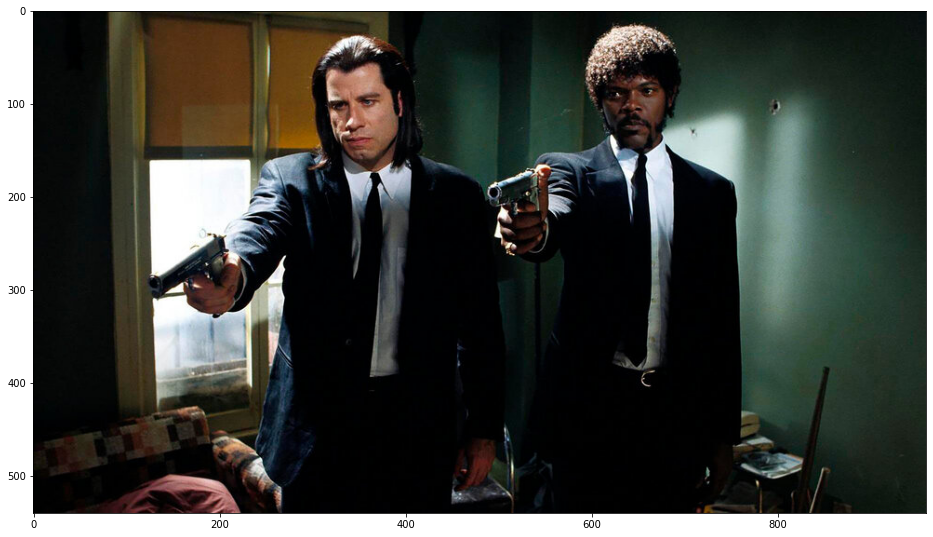

In [5]:
img_pulp = read_and_resize_image('pulp.jpg', grayscale = False, fx= 1, fy=1)
showInRow([img_pulp])

<CascadeClassifier 0x7f0f5fe738b0>
time taken: 0.3813300132751465
2


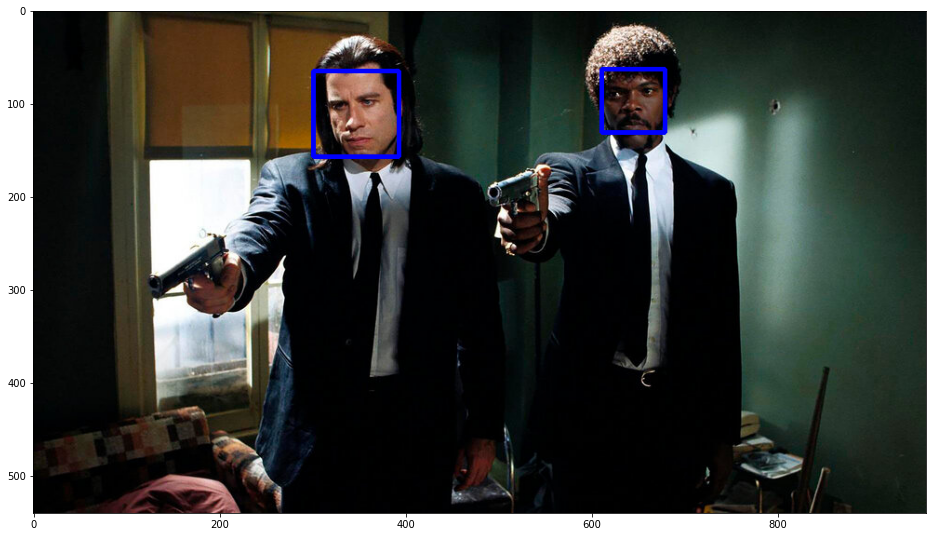

In [6]:
img_pulp_copy = img_pulp.copy()


face_cascade_pulp = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
print(face_cascade_pulp)
start = time.time()
faces = face_cascade_pulp.detectMultiScale(img_pulp)
print(f'time taken: {time.time()-start}')
print(len(faces))
for (x,y,w,h) in faces:
    cv2.rectangle(img_pulp_copy,(x,y),(x+w,y+h),(0,0,255),4)
        
showInRow([img_pulp_copy])

## Same for cats

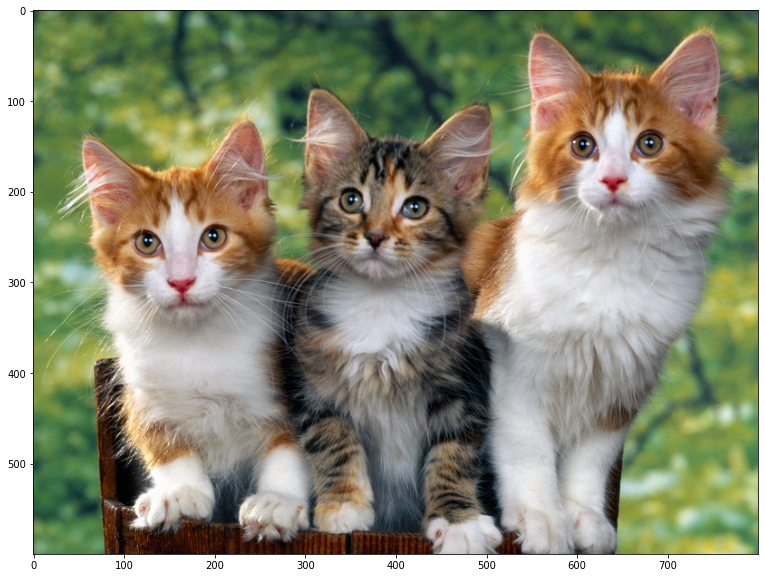

In [7]:
img_cats = read_and_resize_image('cats.jpg', grayscale = False, fx= 0.5, fy=0.5)
showInRow([img_cats])

3


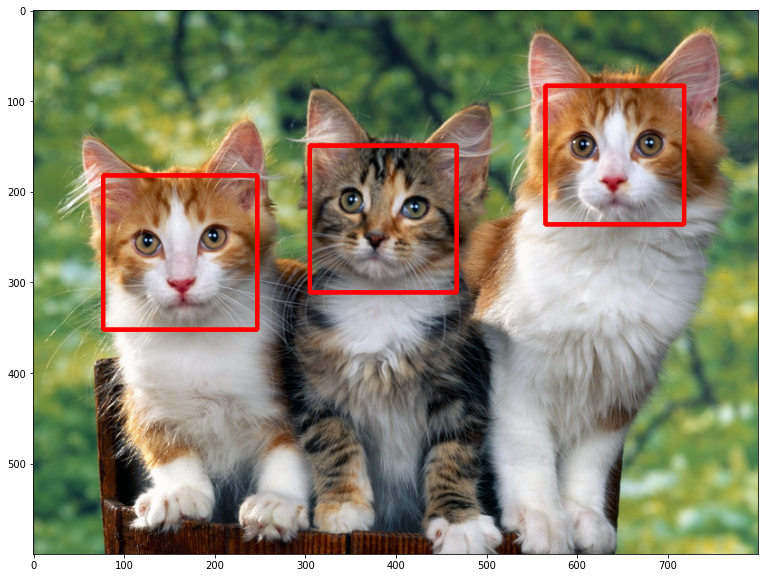

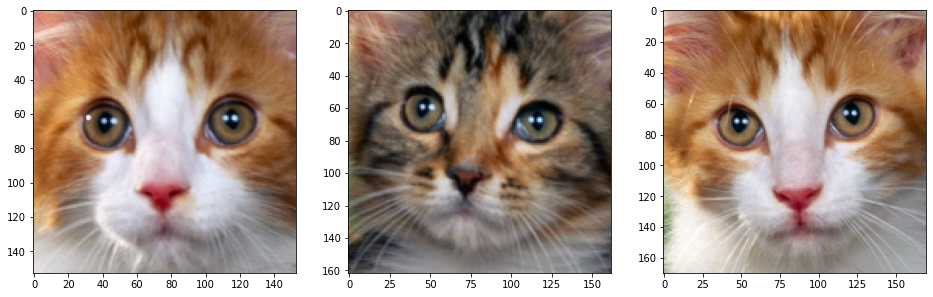

In [8]:
face_cascade_cats = cv2.CascadeClassifier('haarcascade_frontalcatface.xml')

cat_faces_positions = face_cascade_cats.detectMultiScale(img_cats)
print(len(cat_faces_positions))
cat_faces = []
for (x,y,w,h) in cat_faces_positions:
  cat_faces.append(img_cats.copy()[y:y+h, x:x+w]) 
  cv2.rectangle(img_cats,(x,y),(x+w,y+h),(255,0,0),4)
showInRow([img_cats])
showInRow(cat_faces)

## Task: put cat faces instead of real faces

In [9]:
def Swap_faces(img, faces, boxes, method, counter):
  img_copy = img.copy()
  i = 0
  if method == 'viola_jones':
    for (x,y,w,h) in boxes:
      resized_face = cv2.resize(faces[i],(w,h))
      img_copy[y:y+h, x:x+w] = resized_face
      i+=1
  else:
    start_x, start_y, end_x, end_y = boxes
    w = end_x - start_x
    h = end_y - start_y
    y = start_y
    x = start_x
    resized_face = cv2.resize(faces[counter],(w,h))
    img_copy[y:y+h, x:x+w] = resized_face
  return img_copy

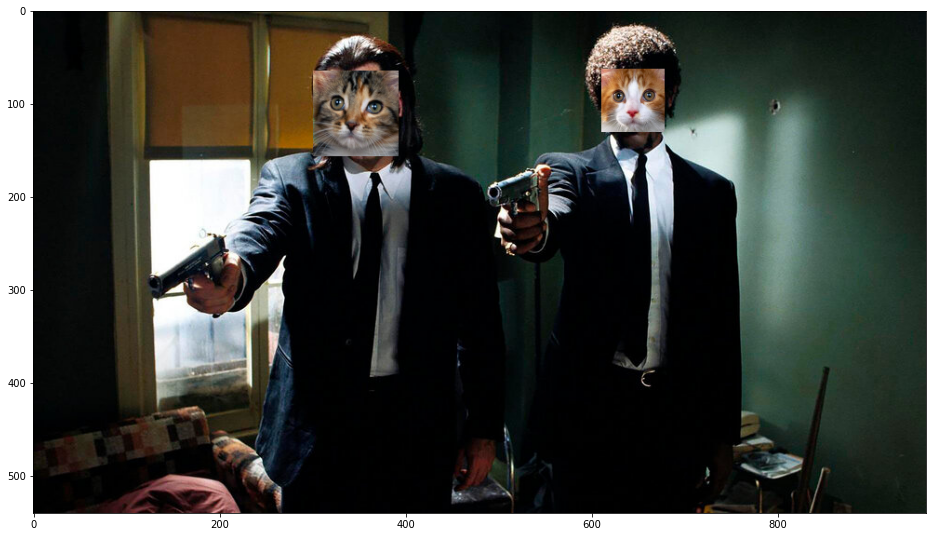

In [12]:
showInRow([Swap_faces(img_pulp, cat_faces, faces, 'viola_jones', 0)])

## Perform Neural Network Algorithm

In [13]:
!wget https://github.com/RufinaMay/CV2019Fall_Pictures/raw/master/deploy.prototxt.txt
!wget https://github.com/RufinaMay/CV2019Fall_Pictures/blob/master/res10_300x300_ssd_iter_140000.caffemodel?raw=true

--2021-02-22 18:15:01--  https://github.com/RufinaMay/CV2019Fall_Pictures/raw/master/deploy.prototxt.txt
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/RufinaMay/CV2019Fall_Pictures/master/deploy.prototxt.txt [following]
--2021-02-22 18:15:01--  https://raw.githubusercontent.com/RufinaMay/CV2019Fall_Pictures/master/deploy.prototxt.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28092 (27K) [text/plain]
Saving to: ‘deploy.prototxt.txt’

deploy.prototxt.txt 100%[===================>]  27.43K  --.-KB/s    in 0.001s  

2021-02-22 18:15:02 (23.3 MB/s) - ‘deploy.prototxt.txt’ saved [28092/28092]


In [19]:
class face_detector():
  def __init__(self):
    self.net = cv2.dnn.readNetFromCaffe('/content/deploy.prototxt.txt', '/content/res10_300x300_ssd_iter_140000.caffemodel?raw=true')
    self.confidence = 0.5
  
  def forward(self, image):
 
    blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0), swapRB = False)
    
    self.net.setInput(blob)
    self.detections = self.net.forward()#forward using the existing dnn.net of opencv 
    
  def detect(self, image):
    self.forward(image)
    (h, w) = image.shape[:2]  
    j = 0 
    for i in range(self.detections.shape[2]):
      confidence = self.detections[0, 0, i, 2]

      if confidence > self.confidence:
        box = self.detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype("int")
        image = Swap_faces(image, cat_faces, box.astype("int"), 'nn' , j)
        j += 1 
        # cv2.rectangle(image, (startX, startY), (endX, endY), (0, 0, 255), 2)
    

    return image


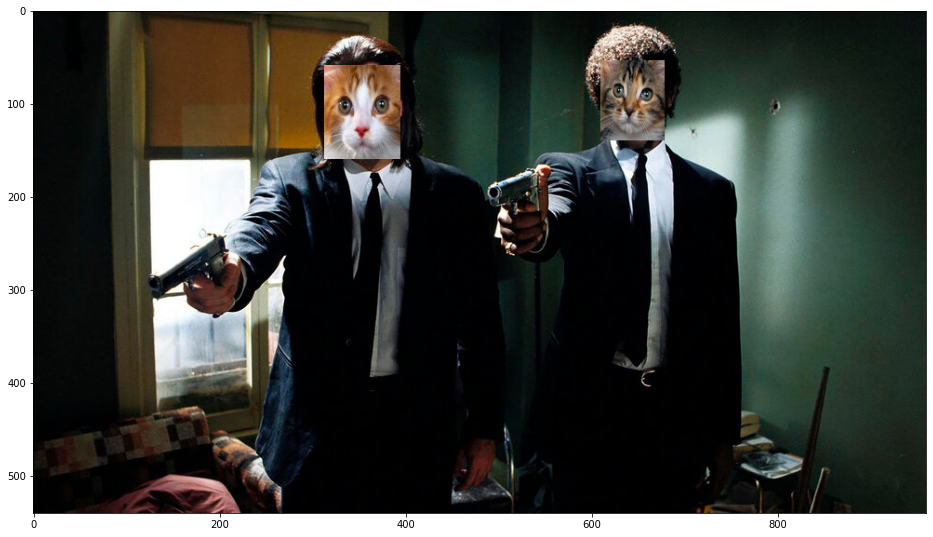

In [20]:
img_pulp = read_and_resize_image('pulp.jpg', grayscale = False, fx= 1, fy=1)

FD = face_detector()

img_pulpout=FD.detect(img_pulp)

showInRow([FD.detect(img_pulp)])

## Face detection on the video

In [21]:
class ViolaJones():
  def __init__(self):
    self.face_cascade = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')
    
  def detect(self, image):
    faces = self.face_cascade.detectMultiScale(image)
    if len(faces)<2:
      for (x,y,w,h) in faces:
        i = 0
        fs = cv2.resize(cat_faces[i],(w,h))
        image[y:y+h, x:x+w] = fs

    else: 
      image_copy = image.copy()
      for f in range(len(faces)):
        x,y,w,h = faces[f]
        i = f+1 if f+1<len(faces) else 0
        x1,y1,w1,h1 = faces[i]
        crop_face = image_copy[y1:y1+h1, x1:x1+w1]
        fs = cv2.resize(crop_face,(w,h))
        image[y:y+h, x:x+w] = fs
        
    return image
#       cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,0),4)

In [22]:
FD = face_detector()
# VJ = ViolaJones()

def detect_faces(frame) -> (np.array, list):
  return FD.detect(frame) #VJ.detect(frame) #FD.detect(frame)

In [23]:

frame_width,frame_height = 720, 1280

out = cv2.VideoWriter('outpy.avi',cv2.VideoWriter_fourcc('M','J','P','G'), 20, (frame_height, frame_width))

process_video("vid.mp4", detect_faces)

out.release()

## Reference
1. link to hackmd file with task: [link](https://hackmd.io/I5zt04dwSuWGBdpJqHhE4w)
2. Face detection in openCV: https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_objdetect/py_face_detection/py_face_detection.html
3. Haar cascade classifier in openCV: https://docs.opencv.org/2.4/doc/user_guide/ug_traincascade.html
4. Caffe framework: http://caffe.berkeleyvision.org/tutorial/
5. For DNN.net in opecnv: # https://docs.opencv.org/3.4/db/d30/classcv_1_1dnn_1_1Net.html 
6. Check har cascade options like smile, eyes etc. for detection: https://github.com/opencv/opencv/tree/master/data/
7. Pretrained models in opencv: https://www.pyimagesearch.com/2017/08/21/deep-learning-with-opencv/

## Addtional Reading on Face Recognition
1. https://research.fb.com/publications/deepface-closing-the-gap-to-human-level-performance-in-face-verification/
2. https://pypi.org/project/deepface/